# DataFrame e Bibliotecas

In [41]:
!pip install ucimlrepo

In [42]:
from ucimlrepo import fetch_ucirepo
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay #saber qual a precisão do modelo
from sklearn.model_selection import KFold, cross_val_score #usar atécnica k-fold pra melhorar o modelo
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# fetch dataset
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

In [43]:
# data (as pandas dataframes)
predict_students_dropout_and_academic_success.data.features

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,0,6,6,2,11.000000,0,11.1,0.6,2.02
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12


In [44]:
predict_students_dropout_and_academic_success.data.features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [45]:
predict_students_dropout_and_academic_success.data.targets

,Target
0,Dropout
1,Graduate
2,Dropout
3,Graduate
4,Graduate
...,...
4419,Graduate
4420,Dropout
4421,Dropout
4422,Graduate


In [46]:
predict_students_dropout_and_academic_success.data.features.describe()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


# Análise de Variávies (Ainda em implementação)


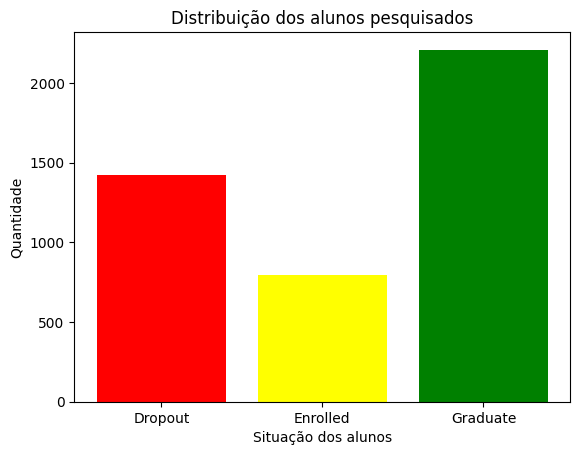

In [47]:
targets = predict_students_dropout_and_academic_success.data.targets
# Contar a frequência de cada valor em `targets`
unique, counts = np.unique(targets, return_counts=True)
colors = ['red','yellow','green']
# Criar o gráfico de barras
plt.bar(unique, counts,color=colors[:len(unique)])
plt.xlabel('Situação dos alunos')
plt.ylabel('Quantidade')
plt.title('Distribuição dos alunos pesquisados')
plt.show()

In [48]:
targets = predict_students_dropout_and_academic_success.data.targets
features = predict_students_dropout_and_academic_success.data.features

In [49]:
targets = targets.iloc[:, 0]  # Pega a primeira (e única) coluna como Série

bestfeatures = SelectKBest(score_func=mutual_info_classif, k=9)
fit = bestfeatures.fit(features,targets)
dfscores = pd.DataFrame(fit.scores_, columns=['Score'])
# Converter os nomes das colunas (features) em um DataFrame
dfcolumns = pd.DataFrame(features.columns, columns=['Feature'])
# Combinar os DataFrames para obter um DataFrame com os nomes das features e seus escores
featureScores = pd.concat([dfcolumns, dfscores], axis=1)

print(featureScores.nlargest(9,'Score'))

                                   Feature     Score
30     Curricular units 2nd sem (approved)  0.306281
31        Curricular units 2nd sem (grade)  0.244247
24     Curricular units 1st sem (approved)  0.236121
25        Curricular units 1st sem (grade)  0.184221
16                 Tuition fees up to date  0.097003
29  Curricular units 2nd sem (evaluations)  0.084204
23  Curricular units 1st sem (evaluations)  0.071730
19                       Age at enrollment  0.052408
3                                   Course  0.049580


# Método Naive Bayes com K-Fold

O método K-Fold separa o DataFrame em n partes, criando n grupos de treinamento, calculando no final a média da performance de cada grupo

In [50]:
# data (as pandas dataframes)
features = predict_students_dropout_and_academic_success.data.features
targets  = predict_students_dropout_and_academic_success.data.targets

In [51]:
kf = KFold(n_splits=9, shuffle=True, random_state=42)  # Use 9-fold cross-validation
accuracies = []
for train_index, test_index in kf.split(features):
    features_train, features_test = features.iloc[train_index], features.iloc[test_index]
    targets_train, targets_test = targets.iloc[train_index], targets.iloc[test_index]
    # Normalização Min-Max
    scaler = MinMaxScaler()
    features_train_scaled = scaler.fit_transform(features_train)
    features_test_scaled = scaler.transform(features_test)
    # Flatten y_train and y_test
    targets_train = targets_train.values.ravel()
    targets_test = targets_test.values.ravel()
    naive_dropout = GaussianNB()
    naive_dropout.fit(features_train, targets_train)
    targets_predict = naive_dropout.predict(features_test)
    accuracy = accuracy_score(targets_test, targets_predict)
    accuracies.append(accuracy)
    print(f"Fold Accuracy: {accuracy:.4f}")
# Calculate and print the mean accuracy
mean_accuracy = np.mean(accuracies)
print(f"Mean Accuracy: {mean_accuracy:.4f}")

Fold Accuracy: 0.7073
Fold Accuracy: 0.6626
Fold Accuracy: 0.6809
Fold Accuracy: 0.6850
Fold Accuracy: 0.6809
Fold Accuracy: 0.6762
Fold Accuracy: 0.6945
Fold Accuracy: 0.6945
Fold Accuracy: 0.6823
Mean Accuracy: 0.6849


Abaixo o gráfico apresenta a precisão do modelo convergindo para seu real valor ao longo dos casos

Mean Accuracy: 0.6849


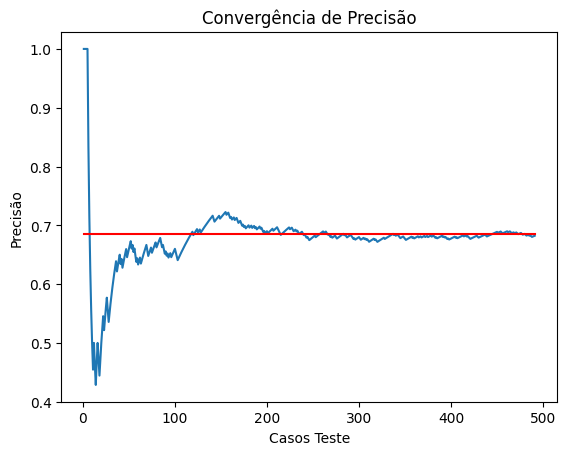

In [52]:
#Grafico de Progressao da Precisao (Provisorio)

print(f"Mean Accuracy: {mean_accuracy:.4f}")

# Calculando precisao acumulada
correct_predictions = np.cumsum(targets_predict == targets_test)
total_predictions = np.arange(1, len(targets_test) + 1)
accuracy_progression = correct_predictions / total_predictions

# Fazendo o grafico
plt.plot(total_predictions, accuracy_progression)
plt.plot(total_predictions, [mean_accuracy] * len(accuracy_progression), color='r')
plt.xlabel('Casos Teste')
plt.ylabel('Precisão')
plt.title('Convergência de Precisão')
plt.show()

## **Método Naive Bayes com K-Fold e usando melhoria com best_features**

In [53]:
# Selecionar as características mais relevantes
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=9)
targets=targets.values.ravel()
fit = bestfeatures.fit(features, targets)
dfscores = pd.DataFrame(fit.scores_, columns=['Score'])
dfcolumns = pd.DataFrame(features.columns, columns=['Feature'])
featureScores = pd.concat([dfcolumns, dfscores], axis=1)

print(featureScores.nlargest(9, 'Score'))

# Criar um pipeline com seleção de características, normalização e Naive Bayes
pipeline = Pipeline([
    ('feature_selection', SelectKBest(score_func=mutual_info_classif, k=9)),
    ('scaler', MinMaxScaler()),
    ('model', GaussianNB())
])
kf = KFold(n_splits=9, shuffle=True, random_state=42)  # Usar 9-fold cross-validation
# Avaliar o pipeline com k-fold cross-validation
scores = cross_val_score(pipeline, features, targets, cv=kf, scoring='accuracy')

print(f'Accuracy scores for each fold: {scores}')
print(f'Mean accuracy: {scores.mean():.4f}')
print(f'Standard deviation: {scores.std():.4f}')

                                   Feature     Score
30     Curricular units 2nd sem (approved)  0.313274
24     Curricular units 1st sem (approved)  0.242169
31        Curricular units 2nd sem (grade)  0.236972
25        Curricular units 1st sem (grade)  0.189073
16                 Tuition fees up to date  0.090164
29  Curricular units 2nd sem (evaluations)  0.085348
23  Curricular units 1st sem (evaluations)  0.084551
28     Curricular units 2nd sem (enrolled)  0.068576
3                                   Course  0.053944
Accuracy scores for each fold: [0.7195122  0.67886179 0.69918699 0.70325203 0.71341463 0.70672098
 0.73319756 0.74745418 0.69246436]
Mean accuracy: 0.7105
Standard deviation: 0.0197


Como o método K-Fold forma vários grupos de treinamento, devemos somar os resultados de cada grupo para formar nossa matriz de confusão

In [58]:
# Inicializar a matriz de confusão combinada
combined_cm = np.zeros((3, 3))

for train_index, test_index in kf.split(features):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = targets[train_index], targets[test_index]

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Gerar a matriz de confusão para este fold
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(targets))
    # Somar à matriz de confusão combinada
    combined_cm += cm


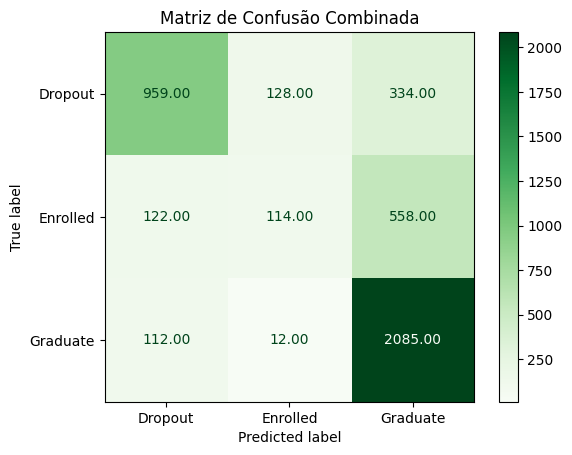

In [59]:
# Plotar a matriz de confusão combinada
disp = ConfusionMatrixDisplay(confusion_matrix=combined_cm, display_labels=np.unique(targets))
disp.plot(cmap='Greens', values_format='.2f')
plt.title('Matriz de Confusão Combinada')
plt.show()